Esse trabalho tem como objetivo a análise de casos de dengue no período de 2000 à 2019.
Iremos analisar situação da doença nas regiões brasileiras ao longo do período citado, se em diferentes biomas há um aumento do número de casos e se existe alguma relação do aumento de casos com acesso a agua ou escassez.

Ultilizamos uma base do kaggle ((https://www.kaggle.com/datasets/raomuhammadsaeedali/brazil-dengue-dataset-2000-2019))




Importar as ferramentas que iremos ultilizar para a análise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Ler o arquivo csv que será usado como nossa base de dados

In [2]:
df_inicial = pd.read_csv("data_2000_2019.csv")
df_inicial

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


# Visão geral

Ver como  estão os nomes de todas as colunas.

In [3]:
df_inicial.columns

Index(['micro_code', 'micro_name', 'micro_name_ibge', 'meso_code', 'meso_name',
       'state_code', 'state_name', 'region_code', 'region_name', 'biome_code',
       'biome_name', 'ecozone_code', 'ecozone_name', 'main_climate', 'month',
       'year', 'time', 'dengue_cases', 'population', 'pop_density', 'tmax',
       'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage'],
      dtype='object')

Ver o tipo de cada dado das colunas e alterar de necessário.

In [4]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133920 entries, 0 to 133919
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   micro_code       133920 non-null  int64  
 1   micro_name       133920 non-null  object 
 2   micro_name_ibge  133920 non-null  object 
 3   meso_code        133920 non-null  int64  
 4   meso_name        133920 non-null  object 
 5   state_code       133920 non-null  int64  
 6   state_name       133920 non-null  object 
 7   region_code      133920 non-null  int64  
 8   region_name      133920 non-null  object 
 9   biome_code       133920 non-null  int64  
 10  biome_name       133920 non-null  object 
 11  ecozone_code     133920 non-null  int64  
 12  ecozone_name     133920 non-null  object 
 13  main_climate     133920 non-null  object 
 14  month            133920 non-null  int64  
 15  year             133920 non-null  int64  
 16  time             133920 non-null  int6

Fazer um describe dos dados.

In [5]:
df_inicial.describe()

,micro_code,meso_code,state_code,region_code,biome_code,ecozone_code,month,year,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
count,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.000000,133920.00000,127224.000000,1.272240e+05,127224.000000,133920.000000,133920.000000,133680.000000,133920.000000,133920.000000,133920.000000
mean,31319.586022,3134.462366,31.302867,2.788530,3.935484,4.433692,6.500000,2009.500000,120.50000,101.358965,3.451623e+05,102.588820,29.417284,18.980845,-0.459147,72.098190,72.286989,0.357296
std,10387.378413,1038.974785,10.385255,1.136753,2.134247,2.673739,3.452065,5.766303,69.28169,971.192888,8.878110e+05,365.514023,3.461089,3.644395,1.907180,16.630274,17.021309,0.240645
min,11001.000000,1101.000000,11.000000,1.000000,1.000000,1.000000,1.000000,2000.000000,1.00000,0.000000,2.096000e+03,0.227461,14.425291,4.615391,-7.634145,22.300000,16.680000,0.000000
25%,24007.000000,2401.000000,24.000000,2.000000,2.000000,2.000000,3.750000,2004.750000,60.75000,0.000000,1.013560e+05,12.397913,27.555401,16.923784,-1.750176,58.390000,62.680000,0.160100
50%,31027.500000,3107.000000,31.000000,3.000000,5.000000,5.000000,6.500000,2009.500000,120.50000,4.000000,1.737065e+05,31.785652,30.162950,19.892204,-0.566704,72.750000,74.875000,0.325850
75%,41007.000000,4103.000000,41.000000,4.000000,6.000000,7.000000,9.250000,2014.250000,180.25000,29.000000,3.046640e+05,63.268632,31.774971,21.770352,0.717594,86.680000,85.700000,0.531700
max,53001.000000,5301.000000,53.000000,5.000000,6.000000,8.000000,12.000000,2019.000000,240.00000,88821.000000,1.504189e+07,6374.149599,37.885544,25.765200,7.479940,100.000000,98.810000,1.000000


# Cópia

Fazer um cópia para que não seja alterado o banco base.

In [6]:
df_copia = df_inicial.copy()
df_copia

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,52015,Meia Ponte,MEIA PONTE,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,52016,Pires do Rio,PIRES DO RIO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,52017,Catal<e3>o,CATALÃO,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,52018,Quirin<f3>polis,QUIRINÓPOLIS,5205,Sul Goiano,52,Goiás,5,Centre-West,2,...,240,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


# Excluir colunas

Excluindo colunas com código dos nomes da microrregião, mesoregião, estado, região, bioma e ecozone porque não vamos precisar ligar esse banco com nenhum outro para a análise.
Foi excluído também a coluna micro_name por ser uma repetição do nome do município já presente em outra coluna, ecozone_name por serem detalhes que não iremos utilizar na análise, sendo a coluna biomas já suficiente para tal, tmax e tmin por não serem ultilizadas na análise, meso_name pelo mesmo motivo.

In [7]:
df_copia.drop(['micro_code', 'meso_code', 'state_code', 'region_code', 'biome_code', 'ecozone_code', 'micro_name', 'ecozone_name', 'tmax', 'tmin', 'pdsi', 'meso_name'], axis='columns', inplace=True)
df_copia

,micro_name_ibge,state_name,region_name,biome_name,main_climate,month,year,time,dengue_cases,population,pop_density,urban,water_network,water_shortage
0,PORTO VELHO,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,85.20,33.57,0.2245
1,GUAJARÁ-MIRIM,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,72.31,27.43,0.0873
2,ARIQUEMES,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,66.91,27.76,0.1871
3,JI-PARANÁ,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,68.68,32.23,0.2381
4,ALVORADA D'OESTE,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,MEIA PONTE,Goiás,Centre-West,Cerrado,AW,12,2019,240,111.0,409691.0,19.397264,89.69,79.10,0.4656
133916,PIRES DO RIO,Goiás,Centre-West,Cerrado,AW,12,2019,240,42.0,100780.0,10.579541,72.80,71.34,0.2444
133917,CATALÃO,Goiás,Centre-West,Cerrado,AW,12,2019,240,57.0,176527.0,11.591627,89.47,88.74,0.6508
133918,QUIRINÓPOLIS,Goiás,Centre-West,Cerrado,AW,12,2019,240,41.0,128463.0,7.991280,85.36,77.39,0.4802


# Duplicados

Avaliando e retirando dados duplicados, mas o dataframe não possui dados duplicados.

In [8]:
df_copia.drop_duplicates(inplace=True)
df_copia.shape


(133920, 14)

# Renomear colunas

Renomeando as colunas em português para melhor compreensão do público na apresentação dos dados.

In [9]:
df = df_copia.rename(columns={
  'micro_name_ibge': 'municipio',
  'state_name': 'estado',
  'region_name': 'regiao',
  'biome_name': 'bioma',
  'main_climate': 'clima_principal',
  'month': 'mes',
  'year': 'ano',
  'time': 'indice_mes',
  'dengue_cases': 'casos_dengue',
  'population': 'populacao',
  'pop_density': 'densidade_populacao',
  'urban': 'populacao_urbana',
  'water_network': 'acesso_agua',
  'water_shortage': 'escassez_agua'
})
df

,municipio,estado,regiao,bioma,clima_principal,mes,ano,indice_mes,casos_dengue,populacao,densidade_populacao,populacao_urbana,acesso_agua,escassez_agua
0,PORTO VELHO,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,85.20,33.57,0.2245
1,GUAJARÁ-MIRIM,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,72.31,27.43,0.0873
2,ARIQUEMES,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,66.91,27.76,0.1871
3,JI-PARANÁ,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,68.68,32.23,0.2381
4,ALVORADA D'OESTE,Rondônia,North,Amazon,AM,1,2000,1,NaN,NaN,NaN,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,MEIA PONTE,Goiás,Centre-West,Cerrado,AW,12,2019,240,111.0,409691.0,19.397264,89.69,79.10,0.4656
133916,PIRES DO RIO,Goiás,Centre-West,Cerrado,AW,12,2019,240,42.0,100780.0,10.579541,72.80,71.34,0.2444
133917,CATALÃO,Goiás,Centre-West,Cerrado,AW,12,2019,240,57.0,176527.0,11.591627,89.47,88.74,0.6508
133918,QUIRINÓPOLIS,Goiás,Centre-West,Cerrado,AW,12,2019,240,41.0,128463.0,7.991280,85.36,77.39,0.4802


# Descrição das colunas:

Editamos as colunas para melhor compreensão e ficaram assim:

municipio = Nome da cidade;

estado = Estado;

regiao = Região;

bioma = Bioma;

clima_principal = Principal regime climático prevalente no município;

mes = Mês civil, 1 = janeiro a 12 = dezembro;

ano = Ano 2000 - 2019;

indice_mes = começando em 1 para janeiro de 2000 indo até 240 em dezembro 2019;

casos_dengue = Casos de dengue notificados registrados no sistema de agravos de notificação compulsória do Brasil (SINAN)
no município, no mês dos primeiros sintomas;

populacao = População estimada, com base em projeções calculadas usando os Censos de 2000 e 2010,
e contagens realizadas em 2007 e 2017;

densidade_polulacao = Densidade populacional/área_km²;

populacao_urbana = População urbana porcentagem de habitantes vivendo em áreas urbanas de acordo com o censo de 2010;

acesso_agua = Acesso à rede de água, porcentagem de habitantes com acesso à rede de água encanada de acordo com o censo de 2010;

escassez_agua = Escassez de água, frequência de escassez de água relatada por município entre 2000 e 2016;

# Retirar os dados nulos


In [10]:
df.isnull().sum()

municipio                 0
estado                    0
regiao                    0
bioma                     0
clima_principal           0
mes                       0
ano                       0
indice_mes                0
casos_dengue           6696
populacao              6696
densidade_populacao    6696
populacao_urbana          0
acesso_agua               0
escassez_agua             0
dtype: int64

usando código para excluir todos os dados nulos.

In [11]:
df_ = df.dropna()
df_

,municipio,estado,regiao,bioma,clima_principal,mes,ano,indice_mes,casos_dengue,populacao,densidade_populacao,populacao_urbana,acesso_agua,escassez_agua
6696,PORTO VELHO,Rondônia,North,Amazon,AM,1,2001,13,267.0,426640.0,6.503234,85.20,33.57,0.2245
6697,GUAJARÁ-MIRIM,Rondônia,North,Amazon,AM,1,2001,13,12.0,61321.0,1.504577,72.31,27.43,0.0873
6698,ARIQUEMES,Rondônia,North,Amazon,AM,1,2001,13,2.0,143809.0,5.903734,66.91,27.76,0.1871
6699,JI-PARANÁ,Rondônia,North,Amazon,AM,1,2001,13,93.0,306896.0,12.241386,68.68,32.23,0.2381
6700,ALVORADA D'OESTE,Rondônia,North,Amazon,AM,1,2001,13,1.0,74460.0,4.658250,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,MEIA PONTE,Goiás,Centre-West,Cerrado,AW,12,2019,240,111.0,409691.0,19.397264,89.69,79.10,0.4656
133916,PIRES DO RIO,Goiás,Centre-West,Cerrado,AW,12,2019,240,42.0,100780.0,10.579541,72.80,71.34,0.2444
133917,CATALÃO,Goiás,Centre-West,Cerrado,AW,12,2019,240,57.0,176527.0,11.591627,89.47,88.74,0.6508
133918,QUIRINÓPOLIS,Goiás,Centre-West,Cerrado,AW,12,2019,240,41.0,128463.0,7.991280,85.36,77.39,0.4802


# Resetando os índices.

Reordenando os índices para análise, já que alguns dados nulos foram apagados.

In [12]:
df_dengue = df_.reset_index(drop=True)
df_dengue

,municipio,estado,regiao,bioma,clima_principal,mes,ano,indice_mes,casos_dengue,populacao,densidade_populacao,populacao_urbana,acesso_agua,escassez_agua
0,PORTO VELHO,Rondônia,North,Amazon,AM,1,2001,13,267.0,426640.0,6.503234,85.20,33.57,0.2245
1,GUAJARÁ-MIRIM,Rondônia,North,Amazon,AM,1,2001,13,12.0,61321.0,1.504577,72.31,27.43,0.0873
2,ARIQUEMES,Rondônia,North,Amazon,AM,1,2001,13,2.0,143809.0,5.903734,66.91,27.76,0.1871
3,JI-PARANÁ,Rondônia,North,Amazon,AM,1,2001,13,93.0,306896.0,12.241386,68.68,32.23,0.2381
4,ALVORADA D'OESTE,Rondônia,North,Amazon,AM,1,2001,13,1.0,74460.0,4.658250,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127219,MEIA PONTE,Goiás,Centre-West,Cerrado,AW,12,2019,240,111.0,409691.0,19.397264,89.69,79.10,0.4656
127220,PIRES DO RIO,Goiás,Centre-West,Cerrado,AW,12,2019,240,42.0,100780.0,10.579541,72.80,71.34,0.2444
127221,CATALÃO,Goiás,Centre-West,Cerrado,AW,12,2019,240,57.0,176527.0,11.591627,89.47,88.74,0.6508
127222,QUIRINÓPOLIS,Goiás,Centre-West,Cerrado,AW,12,2019,240,41.0,128463.0,7.991280,85.36,77.39,0.4802


Mostrando que não tem mais valores nulos no dataframe.

In [13]:
df_dengue.isnull().sum()

municipio              0
estado                 0
regiao                 0
bioma                  0
clima_principal        0
mes                    0
ano                    0
indice_mes             0
casos_dengue           0
populacao              0
densidade_populacao    0
populacao_urbana       0
acesso_agua            0
escassez_agua          0
dtype: int64

Describe com as colunas renomeadas e com somente as que serão ultilizadas na análise.

In [14]:
df_dengue.describe()

,mes,ano,indice_mes,casos_dengue,populacao,densidade_populacao,populacao_urbana,acesso_agua,escassez_agua
count,127224.000000,127224.000000,127224.000000,127224.000000,1.272240e+05,127224.000000,127224.000000,127224.000000,127224.000000
mean,6.500000,2010.000000,126.500000,101.358965,3.451623e+05,102.588820,72.098190,72.286989,0.357296
std,3.452066,5.477247,65.817556,971.192888,8.878110e+05,365.514023,16.630277,17.021313,0.240645
min,1.000000,2001.000000,13.000000,0.000000,2.096000e+03,0.227461,22.300000,16.680000,0.000000
25%,3.750000,2005.000000,69.750000,0.000000,1.013560e+05,12.397913,58.390000,62.680000,0.160100
50%,6.500000,2010.000000,126.500000,4.000000,1.737065e+05,31.785652,72.750000,74.875000,0.325850
75%,9.250000,2015.000000,183.250000,29.000000,3.046640e+05,63.268632,86.680000,85.700000,0.531700
max,12.000000,2019.000000,240.000000,88821.000000,1.504189e+07,6374.149599,100.000000,98.810000,1.000000


Salvando o cvs tratado que iremos usar para a análise.

In [24]:
df_dengue ["pais"] = "Brasil"

In [25]:
df_dengue.to_csv('dengue_brasil.csv', index=False)

Lendo o csv e criando um dataframe.

In [26]:
df_dengue = pd.read_csv("dengue_brasil.csv")
df_dengue

,municipio,estado,regiao,bioma,clima_principal,mes,ano,indice_mes,casos_dengue,populacao,densidade_populacao,populacao_urbana,acesso_agua,escassez_agua,pais
0,PORTO VELHO,Rondônia,North,Amazon,AM,1,2001,13,267.0,426640.0,6.503234,85.20,33.57,0.2245,Brasil
1,GUAJARÁ-MIRIM,Rondônia,North,Amazon,AM,1,2001,13,12.0,61321.0,1.504577,72.31,27.43,0.0873,Brasil
2,ARIQUEMES,Rondônia,North,Amazon,AM,1,2001,13,2.0,143809.0,5.903734,66.91,27.76,0.1871,Brasil
3,JI-PARANÁ,Rondônia,North,Amazon,AM,1,2001,13,93.0,306896.0,12.241386,68.68,32.23,0.2381,Brasil
4,ALVORADA D'OESTE,Rondônia,North,Amazon,AM,1,2001,13,1.0,74460.0,4.658250,42.82,21.40,0.2837,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127219,MEIA PONTE,Goiás,Centre-West,Cerrado,AW,12,2019,240,111.0,409691.0,19.397264,89.69,79.10,0.4656,Brasil
127220,PIRES DO RIO,Goiás,Centre-West,Cerrado,AW,12,2019,240,42.0,100780.0,10.579541,72.80,71.34,0.2444,Brasil
127221,CATALÃO,Goiás,Centre-West,Cerrado,AW,12,2019,240,57.0,176527.0,11.591627,89.47,88.74,0.6508,Brasil
127222,QUIRINÓPOLIS,Goiás,Centre-West,Cerrado,AW,12,2019,240,41.0,128463.0,7.991280,85.36,77.39,0.4802,Brasil


## Visulizações da análise

Text(0, 0.5, 'Casos')

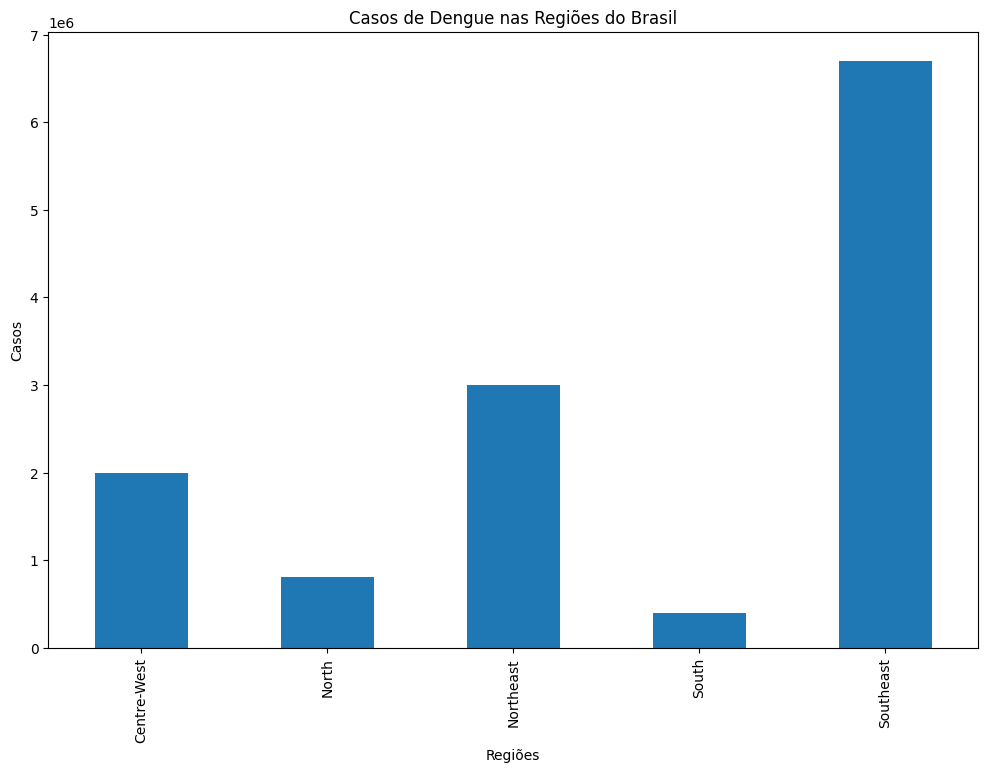

In [17]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["regiao"])["casos_dengue"].sum().plot(kind='bar')
plt.title("Casos de Dengue nas Regiões do Brasil")
plt.xlabel("Regiões")
plt.ylabel("Casos")

A região do Brasil com mais casos de dengue é a região Sudeste, talvez por ser a mais populosa.

Text(0, 0.5, 'Casos de Dengue')

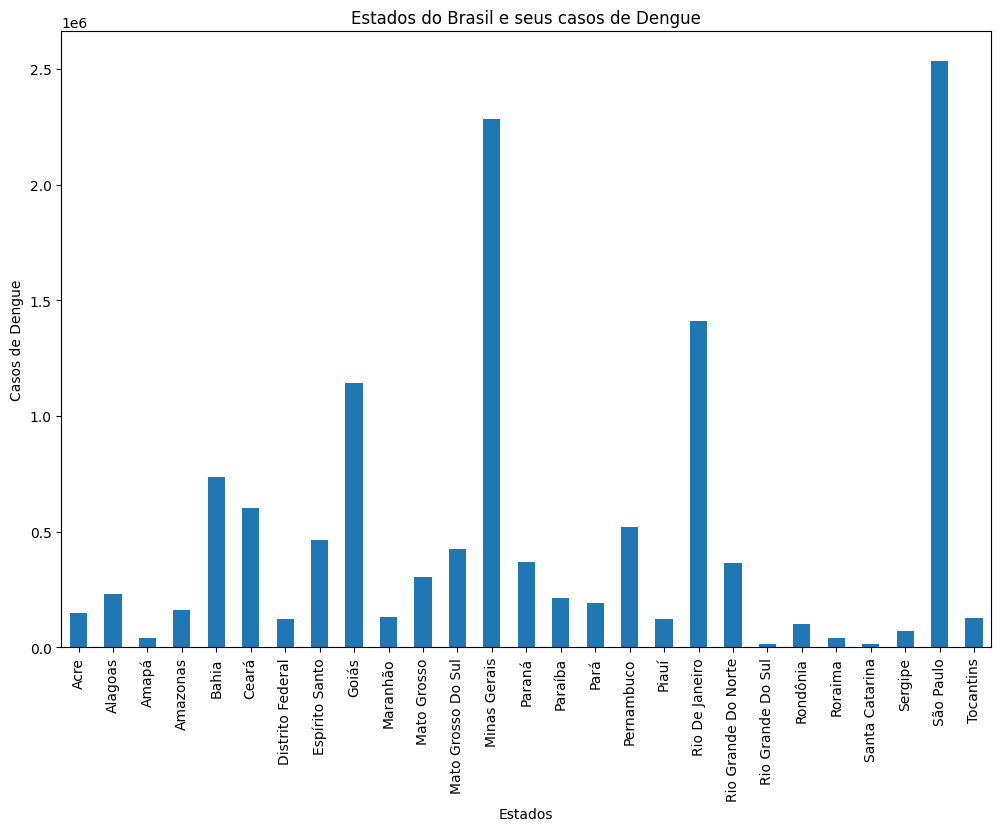

In [27]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["estado"])["casos_dengue"].sum().plot(kind='bar')
plt.title("Estados do Brasil e seus casos de Dengue")
plt.xlabel("Estados")
plt.ylabel("Casos de Dengue")

Aqui observamos um recorte por Estados, onde os da região Sudeste apresentam o maior número de casos. Especialmente o Estado de São Paulo, onde tem a maior densidade de pessoas.

Text(0, 0.5, 'Casos')

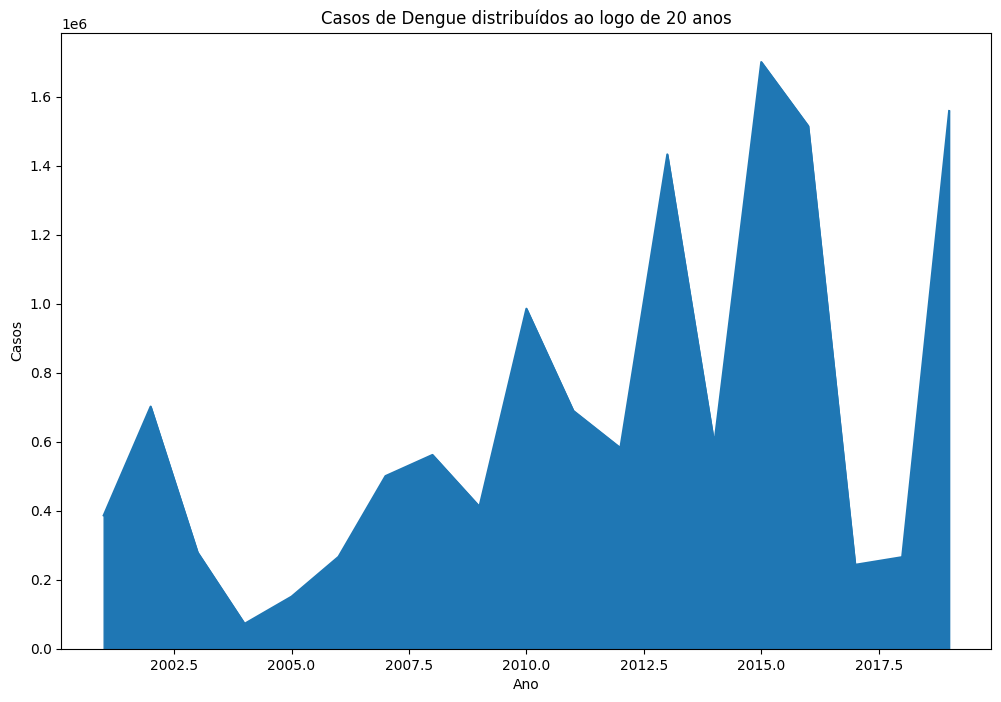

In [19]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["ano"])["casos_dengue"].sum().plot(kind='area')
plt.title("Casos de Dengue distribuídos ao logo de 20 anos")
plt.xlabel("Ano")
plt.ylabel("Casos")

Nessa análise durantes os anos observamos um padrão de picos de casos da doença com período de 2 anos, onde há um aumento e dimunuição quase periódica. Vale ressaltar que esses picos vem aumentando em relação aos anos.

Text(0, 0.5, 'Casos')

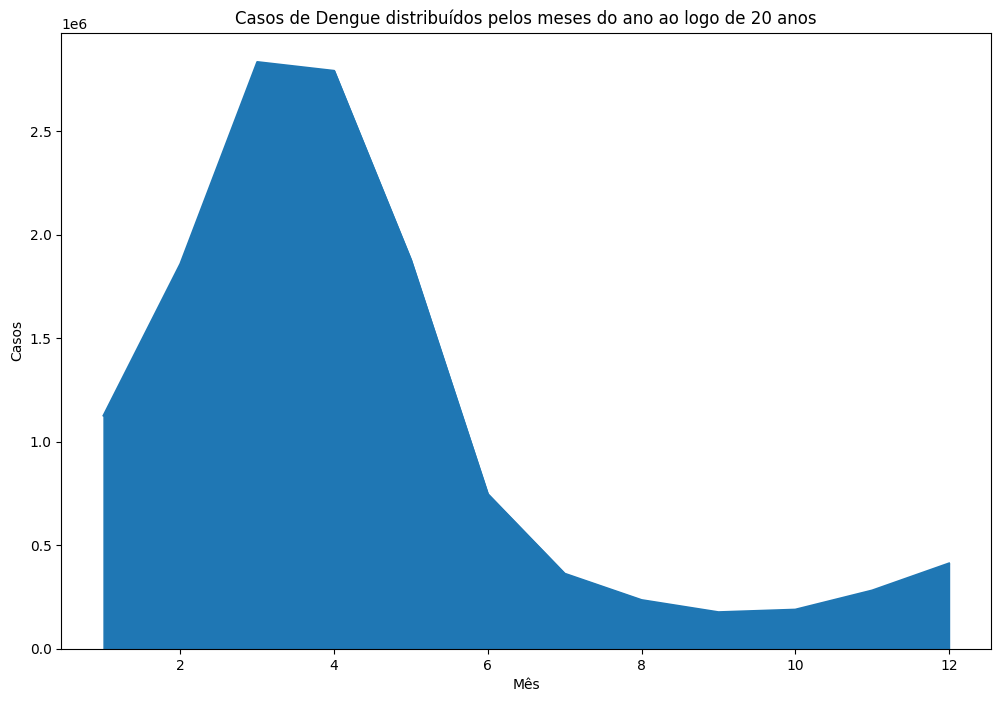

In [20]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["mes"])["casos_dengue"].sum().plot(kind='area')
plt.title("Casos de Dengue distribuídos pelos meses do ano ao logo de 20 anos")
plt.xlabel("Mês")
plt.ylabel("Casos")

Como mostra no gráfico os meses com mais casos são os que compreendem o período do verão. Já que na maioria das Regiões do Brasil é o período mais chuvoso, uma condição propícia para o aumento da doença.

Text(0, 0.5, 'Casos')

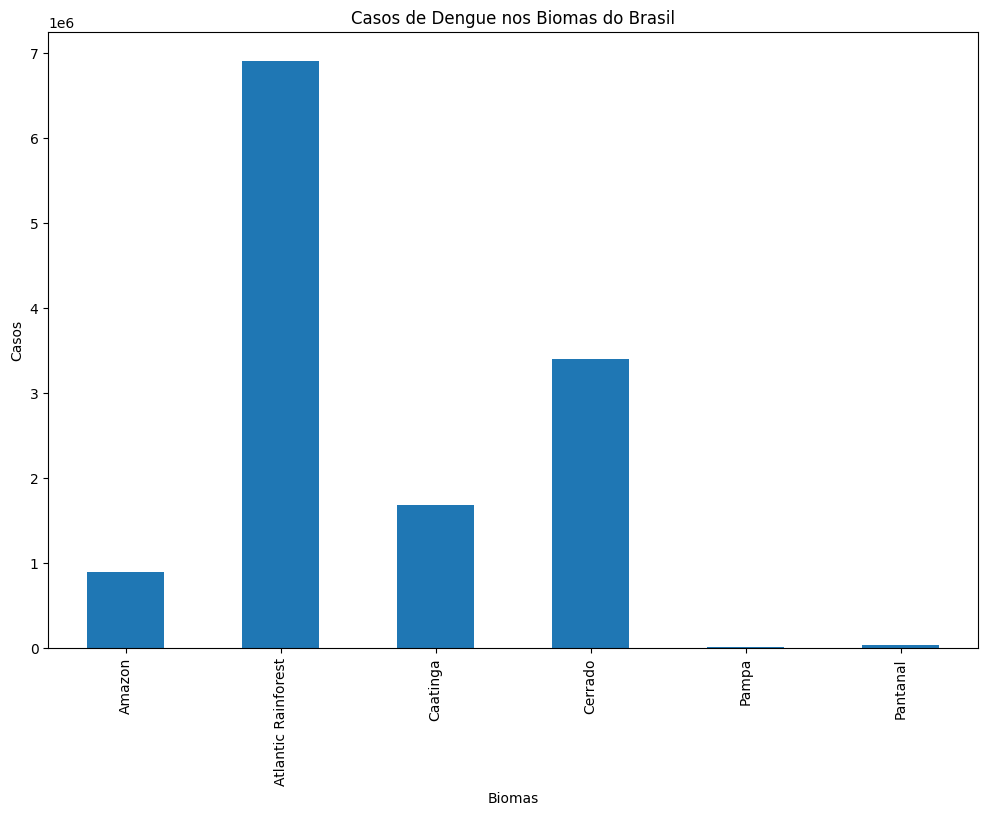

In [21]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["bioma"])["casos_dengue"].sum().plot(kind='bar')
plt.title("Casos de Dengue nos Biomas do Brasil")
plt.xlabel("Biomas")
plt.ylabel("Casos")

A área do bioma com mais casos, Mata Atlântica, abrange a costa leste, sudeste e sul do Brasil. Aonde estão localizadas as regiões com maior número de casos (Sudeste e Nordeste) e também é na Região da Mata Atlântica que vivem cerca de 70% da população brasileira, representando mais de 120 milhões de pessoas.

Text(0, 0.5, 'Porcentagem da População com acesso a água encanada')

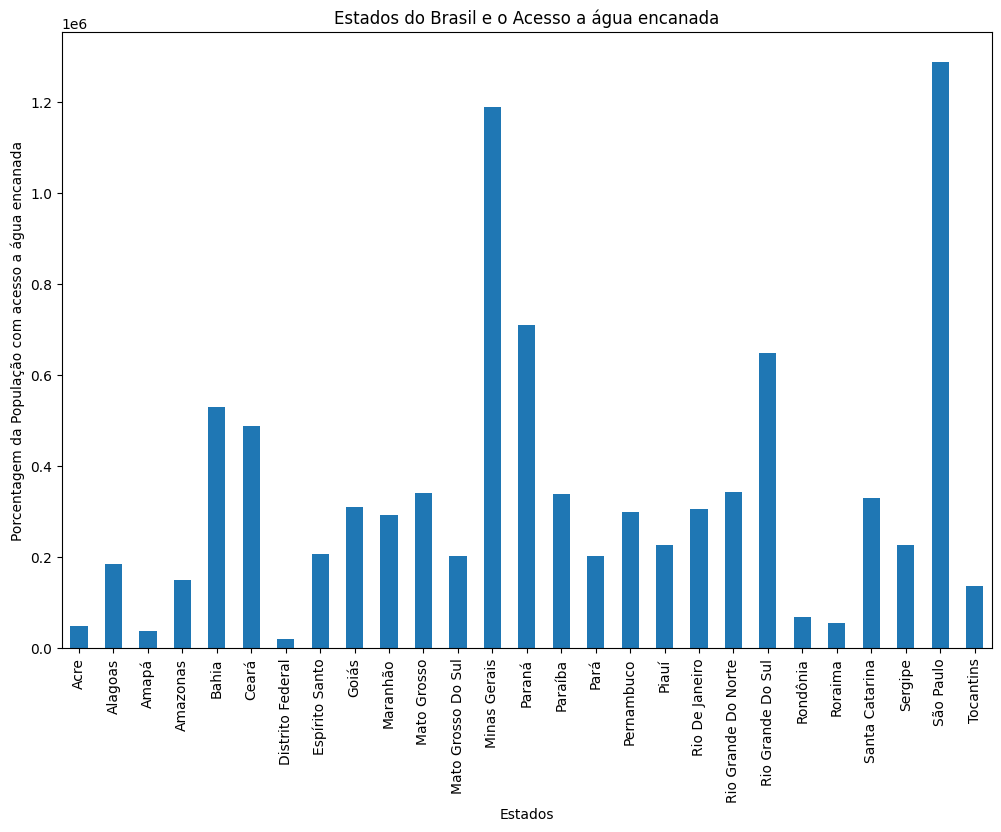

In [22]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["estado"])["acesso_agua"].sum().plot(kind='bar')
plt.title("Estados do Brasil e o Acesso a água encanada")
plt.xlabel("Estados")
plt.ylabel("Porcentagem da População com acesso a água encanada")

Em relação ao acesso a água encanada não há relação com o aumento de casos, já que os Estados com mais acesso, também são os que apresentam maior índice de casos.

Text(0, 0.5, 'Frenguência relatada de escassez de água')

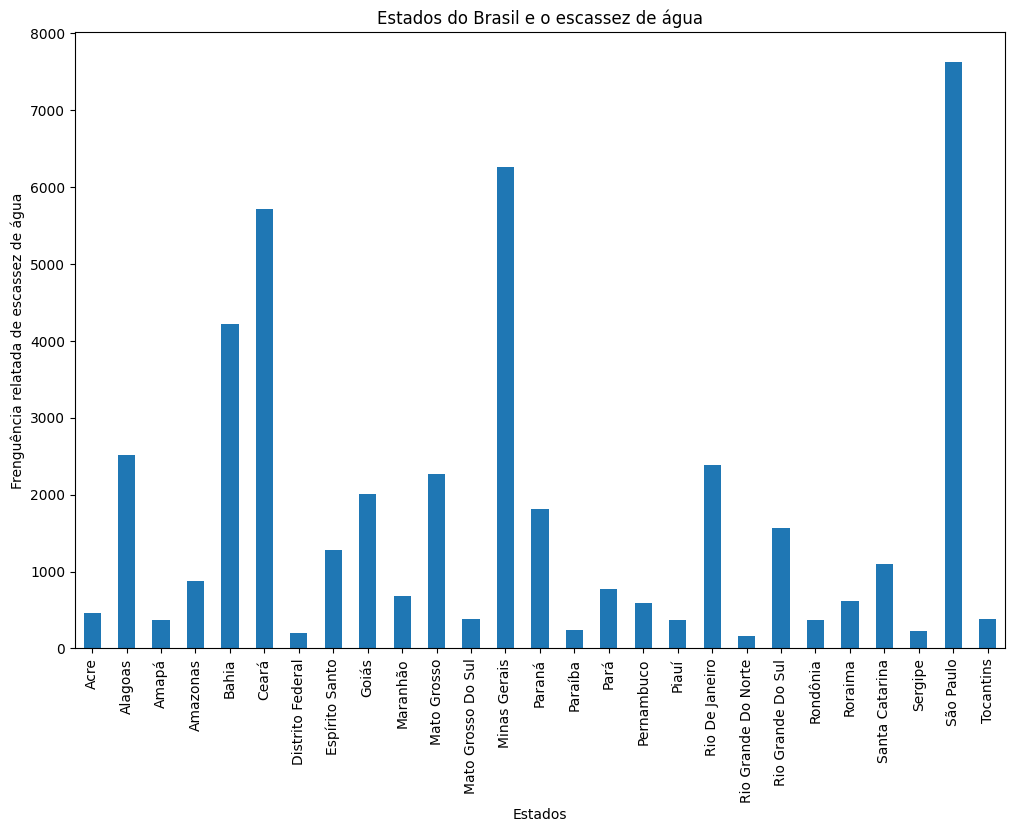

In [23]:
plt.figure(figsize=(12, 8))
df_dengue.groupby(["estado"])["escassez_agua"].sum().plot(kind='bar')
plt.title("Estados do Brasil e o escassez de água")
plt.xlabel("Estados")
plt.ylabel("Frenguência relatada de escassez de água")

A escassez de água está concentrada na região do sudeste, onde  há mais casos, o mau armazenamento e falta de abastecimento do mesmo, acarreta nas condições favoráveis na proliferação da doença.